In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [31]:
walmart = pd.read_csv(r"C:\Users\91863\Downloads\footfalls.csv")
walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


<Axes: >

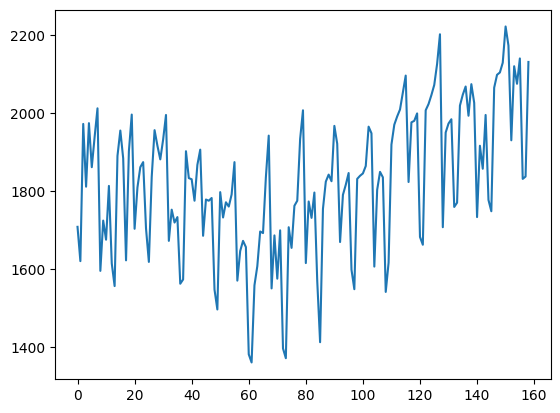

In [32]:
walmart.Footfalls.plot()

In [33]:
# non-linearity

In [34]:
walmart["Date"] = pd.to_datetime(walmart.Month,format = "%b-%y")

#look fro c standard format codes
# extracting day, weekday name, month  name, year from the date column using date funvtions froooom pandas

walmart["month"] = walmart.Date.dt.strftime( " %b") # month extraction
walmart["year"] =  walmart.Date.dt.strftime("%Y") # year extraction


In [35]:
walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,2004
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,Feb,2004


<Axes: xlabel='month', ylabel='year'>

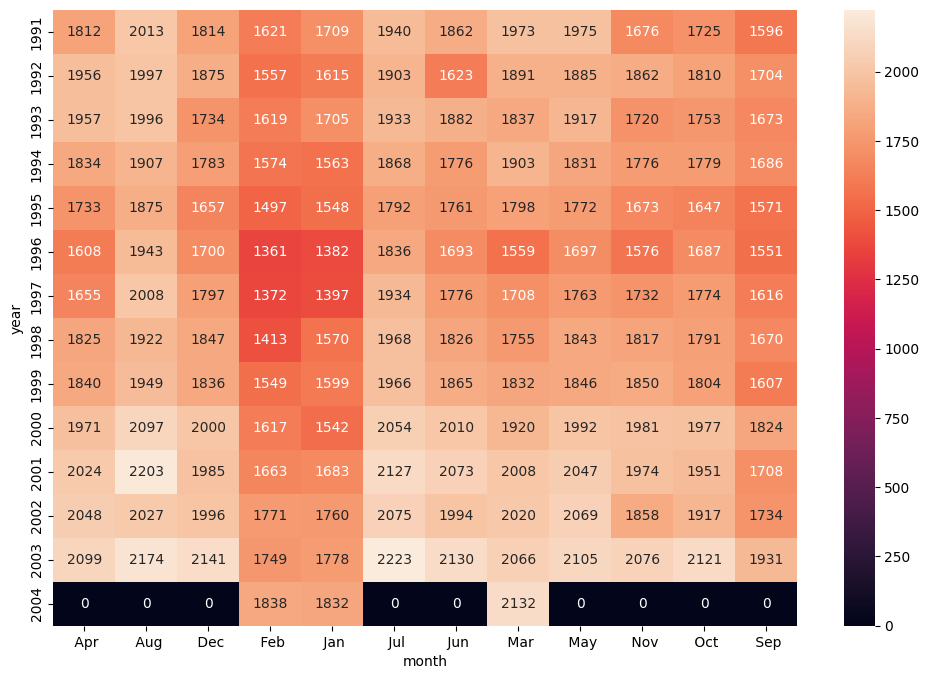

In [36]:
plt.figure(figsize= (12,8))
heatmap_y_month = pd.pivot_table(data=walmart,values="Footfalls",index="year",columns = "month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt = "g")  # fmt iss format of the grid vaalues

<Axes: xlabel='year', ylabel='Footfalls'>

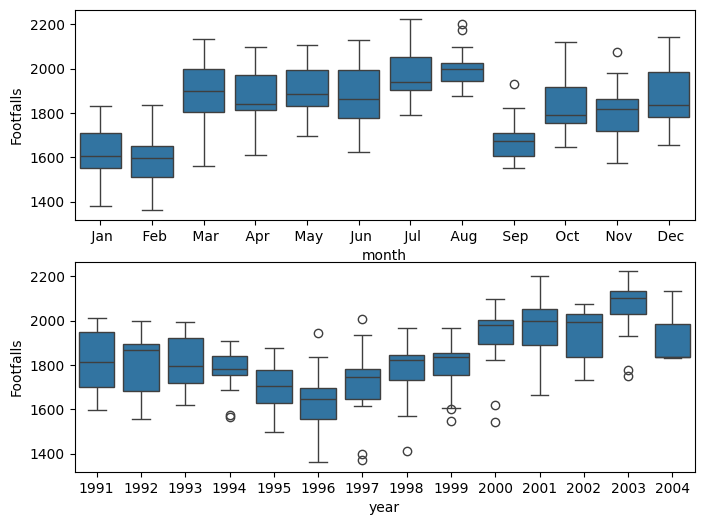

In [37]:
# boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Footfalls",data=walmart)
plt.subplot(212)
sns.boxplot(x="year",y="Footfalls",data=walmart)

<Axes: xlabel='year', ylabel='Footfalls'>

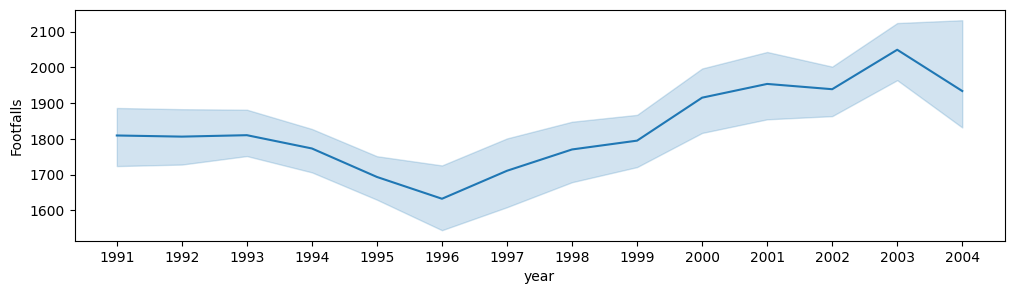

In [38]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=walmart)

# Splitting data

In [39]:
train = walmart.head(147)
test = walmart.tail(12)

In [40]:
# linear model
import statsmodels.formula.api as smf
linear_model = smf.ols("Footfalls~t",data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test["t"])))
rmse_linear = np.sqrt(np.mean((np.array(test["Footfalls"])-np.array(pred_linear))**2))
rmse_linear

209.92559265462572

In [70]:
# exponential

exp = smf.ols("log_footfalls~t",data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test["t"])))
rmse_exp = np.sqrt(np.mean((np.array(test["Footfalls"])-np.array(np.exp(pred_exp)))**2))
rmse_exp  # error is more than linear

217.05263569546594

In [69]:
# quadratic
quad = smf.ols("Footfalls~t+t_square",data=train).fit()
pred_quad = pd.Series(quad.predict(test[["t","t_square"]]))
rmse_quad= np.sqrt(np.mean((np.array(test["Footfalls"])-np.array(pred_quad))**2))
rmse_quad 

137.1546274135614

In [49]:
# additve seasonality
add_sea = smf.ols("Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]]))
rmse_add_sea= np.sqrt(np.mean((np.array(test["Footfalls"])-np.array(pred_add_sea))**2))
rmse_add_sea

264.6643900568777

In [57]:
# additve  quadratic seasonality
add_sea_quad = smf.ols("Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test))
rmse_add_sea_quad= np.sqrt(np.mean((np.array(test["Footfalls"])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

50.60724584151284

In [52]:
# multi seasonality

mul_sea = smf.ols("log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test))
rmse_mul_sea= np.sqrt(np.mean((np.array(test["Footfalls"])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

268.1970325266302

In [55]:
# mutliplicative additve seasonality
mul_add_sea = smf.ols("log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mul_add_sea= np.sqrt(np.mean((np.array(test["Footfalls"])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

172.76726787491043

In [71]:
# comapre theresults
data = {"Model":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mul_sea","rmse_mul_add_sea"]),"RMSE_Values": [rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
table_rmse = pd.DataFrame(data)

table_rmse.sort_values(["RMSE_Values"])

,Model,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_quad,137.154627
6,rmse_mul_add_sea,172.767268
0,rmse_linear,209.925593
1,rmse_exp,217.052636
3,rmse_add_sea,264.664390
5,rmse_mul_sea,268.197033


# preidct for new time period

In [72]:
predict_data = pd.read_csv(r"C:\Users\91863\Downloads\Predict_new.csv")

In [73]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [74]:
# build the model on entire data set
model_full = smf.ols("Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=train).fit()


In [75]:
pred_new = pd.Series(model_full.predict(predict_data))
pred_new

0     2213.628216
1     2252.669534
2     2219.210851
3     2331.668836
4     2384.626820
5     2059.418138
6     2206.876122
7     2204.750773
8     2256.708757
9     2028.471300
10    1999.332467
11    2308.270556
dtype: float64

In [76]:
predict_data["forecasted_Footfalls"] = pd.Series(pred_new)

In [77]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,forecasted_Footfalls
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,2213.628216
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,2252.669534
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,2219.210851
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,2331.668836
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,2384.626820
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,2059.418138
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,2206.876122
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,2204.750773
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,2256.708757
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,2028.471300
